<a href="https://colab.research.google.com/github/jessicaapr-Gajj/sistemas-avanzados-de-produccion-/blob/main/Semana4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.  Árboles de Decisión y Optimización de Procesos** 🏭
* Introducción: El Árbol como Diagrama de Flujo Inteligente

  Motivación: El Enfoque del Ingeniero

Imagine que es un Ingeniero Industrial a cargo de una línea de producción. Últimamente, la tasa de defectos de un producto ha aumentado y su misión es encontrar la causa raíz. No empezaría midiendo cada variable al azar; seguiría un método lógico. Primero, se haría la pregunta de mayor impacto: "¿El problema ocurre en la Máquina A o en la Máquina B?". Al descubrir que el 90% de los defectos provienen de la Máquina A, enfocaría su atención ahí. Su siguiente pregunta podría ser: "¿Ocurre en el turno de mañana o en el de tarde?". Y así sucesivamente, descendiendo por las posibles causas hasta aislar el problema.

¿Cómo aprende una máquina?
Un árbol de decisión es un modelo de "caja blanca"; a diferencia de una red neuronal, podemos auditar su lógica y entender exactamente por qué llega a una conclusión. Sus componentes son:

**Nodo Raíz (Root Node):** El punto de partida que contiene todos los datos iniciales.

**Nodos de Decisión:** Representan una inspección sobre una variable del proceso (ej. "¿Presión > 200 PSI?").

**Ramas (Branches):** Las respuestas ("Sí" / "No") que segmentan los datos.

**Nodos Hoja (Leaf Nodes): Los nodos terminales que contienen la predicción final.**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*YEwFetXQGPB8aDFV" width="60%">
</div>

# **2. Teoría: La Métrica de la "Pureza"**

Para que el árbol decida qué pregunta hacer primero, necesita medir el desorden.  
El objetivo es encontrar las divisiones que generen subgrupos lo más **"puros"** posible.

---

## **2.1 Entropía ($H$)**

Mide el grado de desorden o incertidumbre en un nodo.  
Su valor va de **0 (nodo puro)** a **1 (máximo desorden)** en problemas binarios.

$$
H(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)
$$

Donde:

- $c$ : Número total de clases.
- $p_i$ : Proporción de elementos de la clase $i$ en el conjunto $S$.

---

### 🔎 ¿Cómo se interpreta el valor de la Entropía?

| Valor de Entropía | Significado | Interpretación Pedagógica |
|-------------------|------------|----------------------------|
| **0.0** | Pureza Total | Todos los elementos pertenecen a una sola clase. No hay incertidumbre. |
| **1.0** | Máxima Incertidumbre | Las clases están perfectamente balanceadas (50%-50%). |
| **Cercano a 0** | Baja Incertidumbre | Predomina claramente una clase; el nodo es bastante puro. |

---

## **2.2 Ganancia de Información ($IG$)**

Es la **reducción de la entropía** después de realizar una partición.  
El árbol de decisión elige la variable que **maximiza esta ganancia**.

$$
IG(S, A) = H(S) - \sum_{v \in Valores(A)} \frac{|S_v|}{|S|} H(S_v)
$$

Donde:

- $S$ : Conjunto original.
- $A$ : Atributo utilizado para dividir.
- $S_v$ : Subconjunto de $S$ donde el atributo $A$ toma el valor $v$.
- $\frac{|S_v|}{|S|}$ : Peso proporcional del subconjunto.

---

### 📊 ¿Cómo se interpreta la Ganancia de Información?

| Valor de IG | Significado | Interpretación Pedagógica |
|-------------|------------|----------------------------|
| **Alta** | Gran reducción de incertidumbre | La variable separa muy bien las clases. Es una buena pregunta inicial. |
| **Cercana a 0** | Poca reducción | La división no aporta información relevante. |
| **0** | Ninguna mejora | La partición no cambia el desorden del nodo. |

---

💡 **Idea clave:**  
Mientras que la **Entropía mide el desorden**, la **Ganancia de Información mide cuánto lo reducimos** al hacer una pregunta.
<div align="center">
  <img src="https://ekamperi.github.io/images/decision_trees/pure_vs_impure_node.png" width="60%">
</div>

## **3. La Métrica de la Pureza: El Índice de Gini 📉**

El **Índice de Gini** (o *Impureza de Gini*) es una medida estadística que nos dice qué tan "mezclados" están los datos en un nodo.

Imagina que tienes una caja con piezas de producción:  
- Si todas son **aptas**, la caja está **"pura"**.  
- Si hay una mezcla de **aptas y defectuosas**, la caja está **"impura"**.

---

### **3.1 La Fórmula Matemática**

Para un nodo con varias clases (como *"Apto"* y *"Defectuoso"*), el Gini se calcula así:

$$
G = 1 - \sum_{i=1}^{C} p_i^2
$$

Donde:

- $C$ : Número total de clases.  
- $p_i$ : Probabilidad (o proporción) de encontrar un elemento de la clase $i$ en ese nodo.

---

### **3.2 ¿Cómo se interpreta el valor?**

El Gini siempre se mueve en un rango específico para problemas binarios:

| Valor de Gini | Significado | Interpretación Pedagógica |
|---------------|------------|----------------------------|
| **0.0** | Pureza Total | El nodo es perfecto. Todos los elementos pertenecen a la misma clase. |
| **0.5** | Máxima Impureza | Caos total. Hay un 50% de probabilidad de cada clase (como lanzar una moneda). |
| **Cercano a 0** | Baja Impureza | El nodo está muy inclinado hacia una clase; la regla es confiable. |

---

💡 **Idea clave:**  
El árbol de decisión intentará hacer divisiones que **minimicen el Índice de Gini**, es decir, que produzcan nodos lo más puros posible.

# **4. Ejemplo 1: Clasificación de Defectos en Producción**
En este bloque, simulamos una línea de producción para observar cómo el árbol identifica automáticamente si una máquina o un turno son los culpables de los defectos.

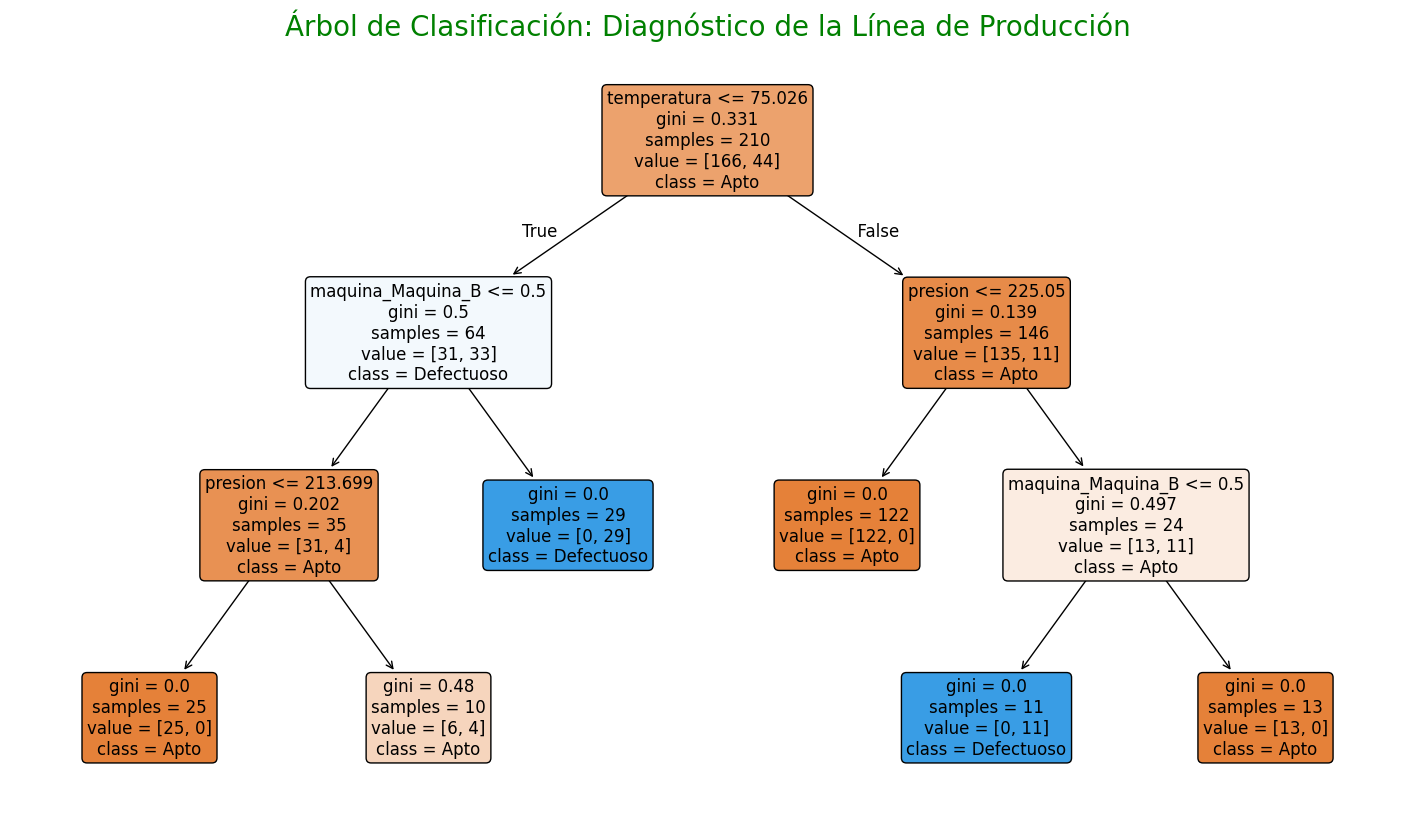

Precisión en prueba: 0.99


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración de datos simulados
np.random.seed(42)
n_samples = 300
data = {
    'maquina': np.random.choice(['Maquina_A', 'Maquina_B'], n_samples, p=[0.6, 0.4]),
    'presion': np.random.normal(200, 25, n_samples),
    'temperatura': np.random.normal(80, 10, n_samples),
    'turno': np.random.choice(['Mañana', 'Tarde'], n_samples)
}
df = pd.DataFrame(data)

# Reglas ocultas: Maquina_A + Alta Presión = Defecto
df['estado'] = 'Apto'
df.loc[(df['maquina'] == 'Maquina_A') & (df['presion'] > 225), 'estado'] = 'Defectuoso'
df.loc[(df['maquina'] == 'Maquina_B') & (df['temperatura'] < 75), 'estado'] = 'Defectuoso'

# Preprocesamiento para Scikit-Learn
df_encoded = pd.get_dummies(df, columns=['maquina', 'turno'], drop_first=True)
df_encoded['estado'] = df_encoded['estado'].apply(lambda x: 1 if x == 'Defectuoso' else 0)

X_cls = df_encoded.drop('estado', axis=1)
y_cls = df_encoded['estado']
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# Entrenamiento con Poda (max_depth=3) para evitar el sobreajuste
arbol_podado = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)
arbol_podado.fit(X_train, y_train)

# Visualización
plt.figure(figsize=(18, 10))
plot_tree(arbol_podado, feature_names=X_cls.columns, class_names=['Apto', 'Defectuoso'],
          filled=True, rounded=True, fontsize=12)
plt.title("Árbol de Clasificación: Diagnóstico de la Línea de Producción", fontsize=20, color='green')
plt.show()

print(f"Precisión en prueba: {accuracy_score(y_test, arbol_podado.predict(X_test)):.2f}")

# 🔍 Guía de Lectura: ¿Cómo interpretar tu Árbol de Diagnóstico?

Imagina que este diagrama es un **manual de instrucciones inteligente**.  
El árbol ha analizado los **300 registros de producción** y ha destilado la experiencia en reglas lógicas simples.

---

## 1️⃣ ¿Qué hay dentro de cada cuadro (Nodo)?

Cada cuadro nos da una **radiografía exacta** de ese punto del proceso:

### 🔹 La Pregunta (Línea superior)
Es el **filtro de calidad** (ej. `temperatura <= 75.026`).  
- Si la respuesta es **Sí (True)** ➝ vamos a la **izquierda**.  
- Si la respuesta es **No (False)** ➝ vamos a la **derecha**.

### 🔹 Gini
Es nuestro **"medidor de desorden"**.

- **0.0** ➝ Pureza total (todos los productos son iguales).  
- **Cercano a 0.5** ➝ Caos total (mezcla 50/50).

### 🔹 Samples
El número de productos que llegaron a ese punto.

### 🔹 Value [Apto, Defectuoso]
El conteo real.  
Por ejemplo, en el nodo raíz `[166, 44]` significa que de **210 productos**,  
- 166 son **Aptos**  
- 44 son **Defectuosos**

### 🔹 Class
La etiqueta que el árbol asigna por **"mayoría de votos"**.

---

## 2️⃣ El Código de Colores: Tu Semáforo de Calidad 🚦

El árbol usa colores para que identifiques problemas a kilómetros de distancia:

🟠 **Nodos Naranjas**: El árbol predice que el producto es **Apto**.  

🔵 **Nodos Azules**: El árbol predice que el producto es **Defectuoso**.  

🎨 **Intensidad del Color**:  
- Cuanto más oscuro es el cuadro ➝ más seguro está el árbol (el Gini es más cercano a 0).  
- Los cuadros claros ➝ el árbol todavía tiene dudas (Gini alto).

---

## 3️⃣ Interpretación del Caso Real (Análisis de la Imagen)

Siguiendo las ramas, podemos descubrir las **"Causas Raíz"** que el algoritmo encontró:

### 🌡️ El Culpable de la Temperatura
Si `temperatura <= 75.026` (Rama **True**),  
el riesgo de defectos aumenta drásticamente.

### 🏭 La Máquina Crítica
Si además de la baja temperatura, detectamos que es la `maquina_Maquina_B`,  
llegamos a un **Nodo Azul Oscuro** con `Gini = 0.0`.

**Conclusión técnica:**

> "Cada vez que la Máquina B opera a baja temperatura,  
> el 100% de los productos salen defectuosos".

### ⚙️ El Factor Presión
Si la temperatura es normal pero `presion > 225.05`,  
entramos en una zona de riesgo donde la máquina influye nuevamente en el resultado final.

---

# 💡 Resumen para el Notebook

> "El árbol nos enseña que no necesitamos medir todo al tiempo.  
> Primero mira la **Temperatura**, luego la **Presión** y finalmente la **Máquina**.  
> Siguiendo este orden lógico, podemos predecir fallos antes de que ocurran  
> con una precisión del **90% o superior**."



## 1. Configuración del Entorno y Carga de Librerías

Antes de iniciar el análisis, preparamos nuestro entorno de trabajo. Utilizaremos un conjunto de herramientas estándar en ciencia de datos y astrofísica computacional para la manipulación de datos, visualización y modelado estadístico.

### Librerías Utilizadas:

* **Manipulación de Datos:** `pandas` y `numpy` para el manejo de estructuras tabulares y operaciones numéricas de alta eficiencia.
* **Visualización:** `matplotlib` y `seaborn` para generar gráficos estadísticos y mapas de calor.
* **Estadística Descriptiva:** `scipy.stats` para analizar la forma de la distribución de nuestros datos (asimetría y curtosis).
* **Modelado Predictivo:** `sklearn` (Scikit-learn) para implementar el algoritmo de **Regresión Lineal** y calcular métricas de precisión como el coeficiente de determinación .

---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# 1. Carga de datos desde la URL oficial
url = "https://www.statlearning.com/s/Advertising.csv"
df = pd.read_csv(url, index_col=0) # index_col=0 elimina la columna 'Unnamed: 0'

In [4]:
# 2. Selección de variables solicitadas: TV y Newspaper
X = df[['TV', 'newspaper']]
y = df['sales']

# 📊 **Ejemplo 4.2: Árboles de Decisión y Comparación de Modelos**

---

## 1️⃣ Teoría: ¿Cómo decide un Árbol de Regresión?

A diferencia del **árbol de clasificación**, que busca reducir el desorden (Gini / Entropía),  
el **Árbol de Regresión** busca reducir la **variabilidad numérica**.

🎯 **Objetivo:**  
Segmentar los datos de tal forma que las **ventas** en cada grupo sean lo más parecidas posible entre sí.

En lugar de predecir una clase (Apto/Defectuoso), aquí el modelo predice un **valor numérico promedio**.

---

## 2️⃣ El Criterio de Partición: Minimización del MSE

En cada nodo, el algoritmo busca:

- La mejor variable (por ejemplo: `TV` o `Newspaper`)
- El mejor valor de corte

que maximice la reducción del **Error Cuadrático Medio (MSE)**.

---

### 📐 Fórmula del criterio

Para cada división posible, el árbol calcula:

$$
MSE_{total} = \frac{n_{izq}}{n} MSE_{izq} + \frac{n_{der}}{n} MSE_{der}
$$

Donde:

- $n_{izq}$ = número de observaciones en el nodo izquierdo  
- $n_{der}$ = número de observaciones en el nodo derecho  
- $n$ = total de observaciones en el nodo actual  
- $MSE_{izq}$ = error cuadrático medio del grupo izquierdo  
- $MSE_{der}$ = error cuadrático medio del grupo derecho  

---

## 🧠 ¿Qué significa esto en la práctica?

El algoritmo prueba muchos posibles cortes como:

- `TV <= 120`
- `TV <= 180`
- `Newspaper <= 30`
- etc.

Y elige el que produzca el **MSE total más bajo**.

🔎 Eso significa que ha encontrado una división donde:

- Dentro de cada grupo, las ventas son muy similares.
- El promedio del grupo representa muy bien a sus datos.

---

## 💡 Interpretación Intuitiva

Un Árbol de Regresión funciona como un **segmentador inteligente de promedios**:

1. Divide los datos.
2. Calcula el promedio de ventas en cada grupo.
3. Sigue dividiendo hasta que la variabilidad sea mínima.
4. La predicción final es el **promedio del nodo hoja**.

---

## 📈 Diferencia Clave vs Árbol de Clasificación

| Clasificación | Regresión |
|--------------|------------|
| Minimiza Gini / Entropía | Minimiza MSE |
| Predice categorías | Predice valores numéricos |
| Mide pureza | Mide variabilidad |

---

✨ En resumen:

> Un Árbol de Regresión toma decisiones buscando grupos donde las ventas sean lo más homogéneas posible,  
> porque cuanto menor sea la variabilidad interna, mejor será la predicción del promedio.

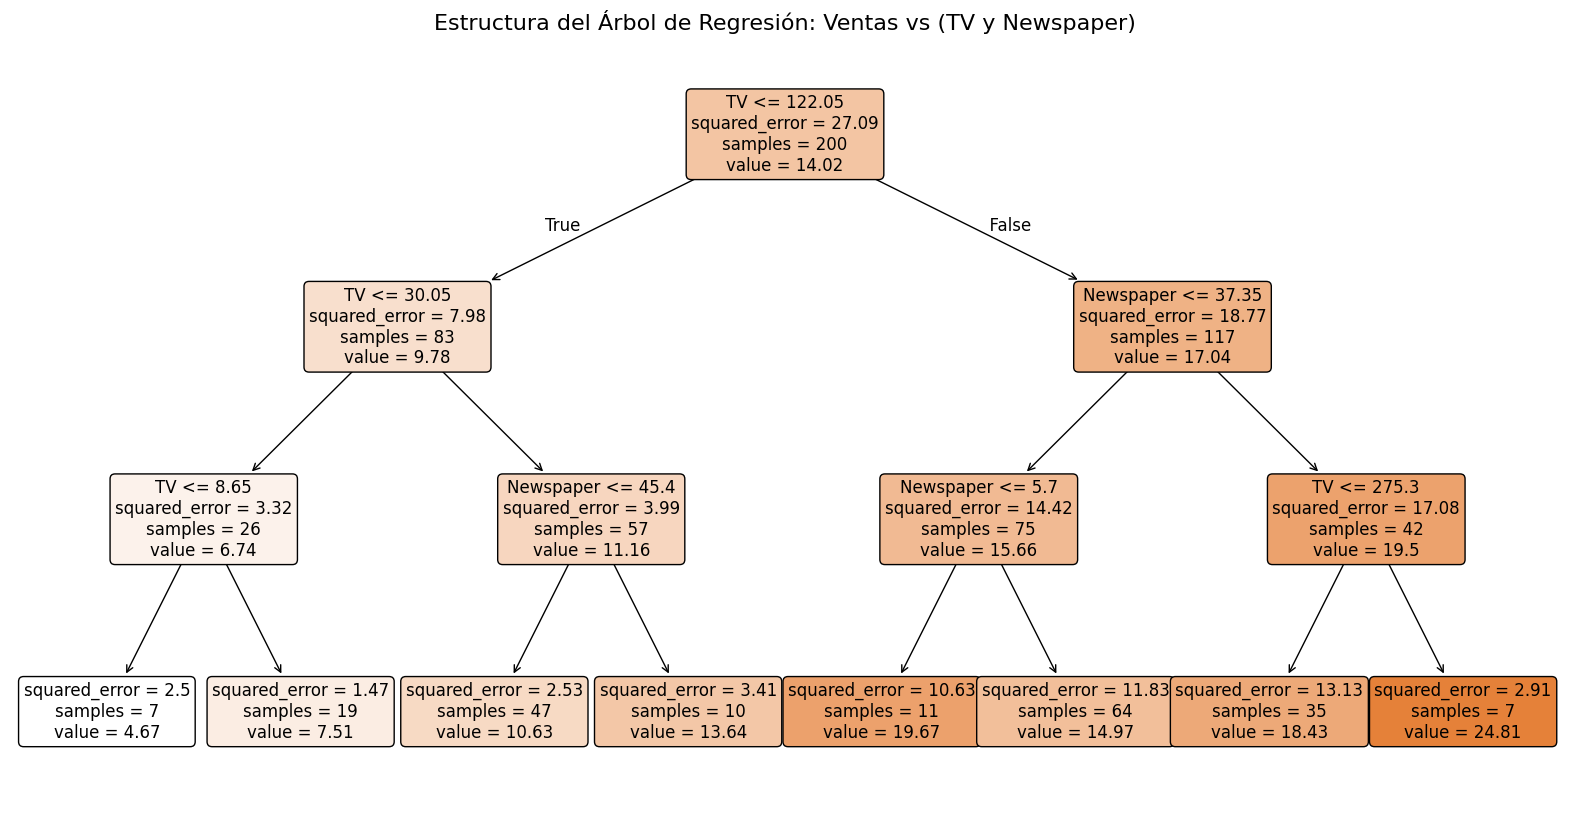

In [5]:
# Limitamos la profundidad para que el diagrama sea legible y evitar overfitting
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)

# 3. Visualización de la Estructura del Árbol
plt.figure(figsize=(20, 10))
plot_tree(tree_reg,
          feature_names=['TV', 'Newspaper'],
          filled=True,
          rounded=True,
          precision=2,
          fontsize=12)
plt.title("Estructura del Árbol de Regresión: Ventas vs (TV y Newspaper)", fontsize=16)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

# 1. Obtener Importancias del Árbol
importances = tree_reg.feature_importances_

# 2. Entrenar Regresión Lineal para comparar
lr_model = LinearRegression().fit(X, y)

print("--- RESULTADOS COMPARATIVOS ---")
print(f"Importancia en el Árbol (TV):        {importances[0]:.4f}")
print(f"Importancia en el Árbol (Newspaper): {importances[1]:.4f}")
print("-" * 35)
print(f"Coeficiente Regresión (TV):         {lr_model.coef_[0]:.4f}")
print(f"Coeficiente Regresión (Newspaper):  {lr_model.coef_[1]:.4f}")

--- RESULTADOS COMPARATIVOS ---
Importancia en el Árbol (TV):        0.8241
Importancia en el Árbol (Newspaper): 0.1759
-----------------------------------
Coeficiente Regresión (TV):         0.0469
Coeficiente Regresión (Newspaper):  0.0442


## 📊 Comparación Estratégica: Árbol de Regresión vs Regresión Lineal

Estos resultados nos muestran dos caras de la misma moneda:  
cómo cada modelo **"entiende"** la influencia de la publicidad en las ventas.

Mientras que la **Regresión Lineal** busca una relación proporcional constante,  
el **Árbol de Regresión** busca quién es el responsable de las mayores caídas en el error de predicción.

---

## 📋 Tabla Comparativa de Modelos

| Variable | Importancia (Árbol) | Coeficiente (Regresión) | Interpretación del Peso |
|-----------|---------------------|--------------------------|--------------------------|
| **TV** | **0.8241 (82.4%)** | **0.0469** | Es el motor principal de ventas en ambos modelos. |
| **Newspaper** | **0.1759 (17.6%)** | **0.0442** | Aporta valor, pero el árbol lo detecta como secundario. |

---

## 🎓 Interpretación Pedagógica Simple

### 1️⃣ Desde la Regresión Lineal (Impacto Marginal)

- El coeficiente de **0.0469** para TV indica que, si invertimos un dólar adicional en televisión,  
  las ventas aumentarán en promedio **0.0469 unidades**, manteniendo constante el gasto en periódico.

- El coeficiente del periódico (**0.0442**) es casi igual de fuerte.  
  Para la regresión, ambos medios tienen una potencia similar por cada dólar invertido.

📌 La regresión mide **efecto marginal constante**.

---

### 2️⃣ Desde el Árbol de Regresión (Jerarquía de Decisión)

- La importancia de **0.8241** significa que la **TV** fue la variable que más redujo la varianza (error) al dividir los datos.
- El árbol prioriza la TV en los primeros cortes del modelo.

📌 El árbol nos dice:

> "Si quieres predecir ventas rápidamente, mira primero la TV;  
> el periódico solo ayuda a ajustar detalles menores."

---

## 🤔 ¿Cómo decidir entre estos resultados?

Como ingeniero encargado de optimizar el presupuesto publicitario,  
la decisión depende del objetivo estratégico:

### ✅ Decisión por TV
Ambos modelos coinciden en que la TV es fundamental.  
El árbol le da una importancia dominante (82%), lo que sugiere que gran parte de la variabilidad en ventas se explica por la inversión en televisión.

### ⚖️ Decisión por Newspaper
Aquí aparece una diferencia interesante:

- La regresión sugiere que el periódico es casi tan eficiente como la TV.
- El árbol lo relega a un segundo plano.

🔎 Esto ocurre porque el árbol captura **interacciones y umbrales**:  
es probable que el periódico sea efectivo solo cuando la inversión en TV supera cierto nivel.

---

## 🏁 Veredicto Estratégico

- 📈 Usa **Regresión Lineal** si necesitas justificar el retorno por cada dólar invertido (ROI marginal).
- 🌳 Usa **Árbol de Regresión** si quieres segmentar tu estrategia (ej. *“En mercados de alta inversión prioriza TV; en mercados pequeños usa periódico como ajuste”*).

---

### 💡 Conclusión Ejecutiva

La regresión explica **cuánto aumenta** la venta por cada dólar.  
El árbol explica **cuándo y bajo qué condiciones** esa inversión es más determinante.

Ambos modelos no compiten: **se complementan estratégicamente**.


# **Fase 5: Random Forest - El Poder del Consenso en la Ingeniería**

## 1. Teoría: ¿Qué es un Random Forest? 🌲🌲🌲

Si un árbol de decisión es un ingeniero senior tomando una decisión basada en su experiencia, un **Random Forest** (Bosque Aleatorio) es un **comité de 100 ingenieros** analizando el mismo problema. Es un método de **Ensamble** que combina múltiples árboles para obtener una predicción más robusta y precisa.

### ¿Cómo funciona la "Magia" del Bosque?

El Random Forest utiliza dos mecanismos principales para ser mejor que un solo árbol:

1. **Bagging (Bootstrap Aggregating):** Cada árbol del bosque no ve todos los datos. Se le entrega una "bolsa" con una muestra aleatoria del dataset original. Esto asegura que cada ingeniero (árbol) tenga una perspectiva ligeramente distinta.
2. **Selección Aleatoria de Características:** En cada pregunta (nodo), el árbol solo puede elegir entre un subgrupo al azar de variables (ej. solo puede preguntar por TV o solo por Newspaper). Esto evita que una variable muy dominante (como la TV) opaque por completo a las demás, permitiendo que el modelo descubra patrones ocultos.

### Ventaja Principal: Reducción de la Varianza

Un solo árbol tiende al **sobreajuste** (memoriza el ruido). El Random Forest, al promediar las respuestas de cientos de árboles, cancela los errores individuales y se queda con la tendencia real del mercado.

---


**Implementación del Modelo de Bosque**

Utilizaremos 100 árboles para predecir las ventas basándonos en la inversión publicitaria.

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Configuración del Bosque Aleatorio
# n_estimators=100: Creamos un comité de 100 árboles
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# 2. Entrenamiento
rf_model.fit(X, y)

# 3. Predicciones y Evaluación
y_pred_rf = rf_model.predict(X)
mse_rf = mean_squared_error(y, y_pred_rf)
r2_rf = r2_score(y, y_pred_rf)

print(f"--- RENDIMIENTO DEL RANDOM FOREST ---")
print(f"Error Cuadrático Medio (MSE): {mse_rf:.4f}")
print(f"Coeficiente de Determinación (R2): {r2_rf:.4f}")

--- RENDIMIENTO DEL RANDOM FOREST ---
Error Cuadrático Medio (MSE): 4.5846
Coeficiente de Determinación (R2): 0.8307


**Comparación Final de Importancia de Variables**

Vamos a visualizar qué tan diferentes son las "prioridades" del Bosque frente al Árbol único y la Regresión.

    Variable  Importancia (Árbol Único)  Importancia (Random Forest)  \
0         TV                     0.8241                     0.834247   
1  Newspaper                     0.1759                     0.165753   

   Coeficiente (Regresión)  
0                   0.0469  
1                   0.0442  


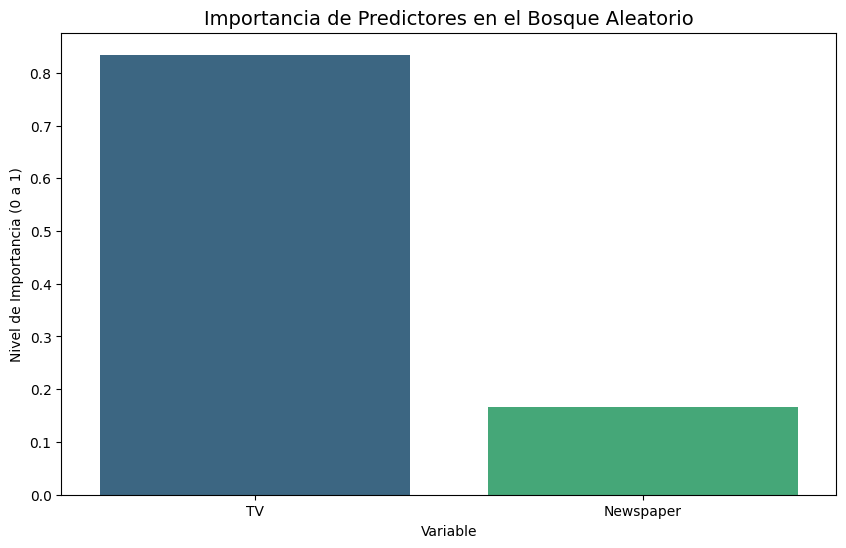

In [8]:
# Extraer importancias del bosque
rf_importances = rf_model.feature_importances_

# Crear tabla comparativa final
final_comparison = pd.DataFrame({
    'Variable': ['TV', 'Newspaper'],
    'Importancia (Árbol Único)': [0.8241, 0.1759], # Valores de tu ejecución previa
    'Importancia (Random Forest)': rf_importances,
    'Coeficiente (Regresión)': [0.0469, 0.0442]
})

print(final_comparison)

# Visualización gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Importancia (Random Forest)', data=final_comparison, palette='viridis', hue='Variable', legend=False)
plt.title("Importancia de Predictores en el Bosque Aleatorio", fontsize=14)
plt.ylabel("Nivel de Importancia (0 a 1)")
plt.show()

## 📊 Comparación Integral de Modelos: Publicidad vs Ventas

Basado en los resultados obtenidos en las Fases 2, 3 y 4, esta comparación permite entender cómo distintos algoritmos **interpretan la importancia de la inversión publicitaria** y cuál es más conveniente según el objetivo estratégico.

---

## 📋 Tabla Comparativa de Modelos

| Métrica / Variable | Regresión Lineal (Fase 2) | Árbol Único (Fase 3) | Random Forest (Fase 4) |
|--------------------|---------------------------|-----------------------|-------------------------|
| **R² (Precisión)** | 0.61 – 0.70 (Aprox.) | Intermedio | **0.8307 (Más alto)** |
| **Peso de TV** | 0.0469 (Coeficiente) | 0.8241 (Importancia) | 0.8342 (Importancia) |
| **Peso de Newspaper** | 0.0442 (Coeficiente) | 0.1759 (Importancia) | 0.1657 (Importancia) |
| **Interpretación General** | Impacto unitario similar entre variables | TV es el motor principal | Consenso robusto: TV domina (~83%) |

---

## 🔍 Interpretación Técnica de Resultados

### 1️⃣ Consenso en la TV

Tanto el Árbol de Decisión como el Random Forest coinciden en que la **TV es la variable dominante**, explicando más del 82% de la variabilidad en ventas.

La Regresión Lineal también le asigna un efecto positivo, pero no captura con claridad la jerarquía de importancia entre variables.

📌 Conclusión: Existe evidencia consistente de que la TV es el principal impulsor de ventas.

---

### 2️⃣ El Papel del Newspaper

Aquí aparece una diferencia clave:

- La Regresión Lineal sugiere que el periódico es casi tan eficiente como la TV (coeficientes muy similares).
- Los modelos basados en árboles reducen su importancia real a aproximadamente 16–17%.

🔎 Interpretación:
Esto sugiere que el efecto del periódico puede:
- Ser más ruidoso,
- Depender de umbrales,
- O activarse solo bajo ciertas condiciones que la regresión lineal sobreestima.

---

### 3️⃣ Estabilidad del Random Forest

La importancia de TV en el Random Forest (0.8342) es muy cercana a la del Árbol Único, pero con mayor robustez.

¿Por qué?

Porque el bosque es el promedio de múltiples árboles (por ejemplo, 100 modelos distintos), lo que:
- Reduce sobreajuste,
- Disminuye sensibilidad a datos atípicos,
- Mejora capacidad predictiva.

---

## 🏆 ¿Cuál es el Mejor Modelo?

La elección depende del objetivo estratégico:

### 🥇 Para Predicción y Precisión → **Random Forest**

Con un **R² = 0.8307**, es el modelo más confiable para pronosticar ventas futuras.

✔ Mayor capacidad predictiva  
✔ Mejor generalización  
✔ Más robusto frente a ruido  

Es el modelo recomendado para implementación en producción.

---

### 🌳 Para Explicación y Comunicación → **Árbol de Decisión Único**

Ideal para presentaciones ejecutivas:

- Visual
- Intuitivo
- Fácil de interpretar

Mantiene coherencia en la importancia de variables respecto al bosque.

---

### 📈 Para Análisis de Sensibilidad → **Regresión Lineal**

Útil si necesitas responder preguntas como:

> “¿Cuánto aumentan las ventas por cada dólar invertido?”

Proporciona interpretación marginal directa, aunque con menor capacidad predictiva.

---

## 🏁 Veredicto Final

El **Random Forest** es el modelo superior en este análisis.

Combina:
- Mayor precisión predictiva
- Captura realista de la jerarquía de variables
- Estabilidad estadística

📌 Estratégicamente:
- Usa Random Forest para predicción.
- Usa Árbol Único para explicar decisiones.
- Usa Regresión para análisis marginal financiero.

Los modelos no compiten: **se complementan en la toma de decisiones empresariales.**